# Page View Time Series Visualizer
This is my solution for the Page View Time Series Visualizer project from FreeCodeCamp. Instructions for this project can be found [here](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer).

## Introduction
Reuploaded from Replit to GitHub and converted to Jupyter Notebook for easier access

The original upload on Replit with my previous attempts can be found [here](https://replit.com/@yemelgen/boilerplate-page-view-time-series-visualizer).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import calendar
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('data/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date' )

# Clean data
df = df[ (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975)) ]

def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots( figsize=(12,6) )
    df.plot(ax=ax, legend=None)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    group = df.groupby( [df.index.year, df.index.month] )
    df_bar = group['value'].mean().unstack()
    
    # Draw bar plot
    fig, ax = plt.subplots( figsize=(12,6) )
    df_bar.plot(kind='bar', ax=ax)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend( title='Months', labels=[calendar.month_name[i] for i in range(1, 13)] )

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots( 1, 2, figsize=(18, 6) )
    sns.boxplot( x='year', y='value', data=df_box, ax=ax[0])
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot( x='month', y='value', data=df_box, ax=ax[1], order=month_order )
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
# Create a clas sto wrap the solution code
class TimeSeriesVisualizer:
    def draw_line_plot(self, *args, **kwargs):
        return draw_line_plot()
    def draw_bar_plot(self, *args, **kwargs):
        return draw_bar_plot()
    def draw_box_plot(self, *args, **kwargs):
        return draw_box_plot()
time_series_visualizer = TimeSeriesVisualizer()
time_series_visualizer.df = df

In [2]:
# NOTE: Copied from test_module.py
import unittest
import matplotlib as mpl

class DataCleaningTestCase(unittest.TestCase):
    def test_data_cleaning(self):
        actual = int(time_series_visualizer.df.count(numeric_only=True))
        expected = 1238
        self.assertEqual(actual, expected, "Expected DataFrame count after cleaning to be 1238.")

class LinePlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = time_series_visualizer.draw_line_plot()
        self.ax = self.fig.axes[0]

    def test_line_plot_title(self):
        actual = self.ax.get_title()
        expected = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
        self.assertEqual(actual, expected, "Expected line plot title to be 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'")
    
    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Date"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'Date'")
        actual = self.ax.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'Page Views'")

    def test_line_plot_data_quantity(self):
        actual = len(self.ax.lines[0].get_ydata())
        expected = 1238
        self.assertEqual(actual, expected, "Expected number of data points in line plot to be 1238.")


class BarPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = time_series_visualizer.draw_bar_plot()
        self.ax = self.fig.axes[0]

    def test_bar_plot_legend_labels(self):
        actual = []
        for label in self.ax.get_legend().get_texts():
          actual.append(label.get_text())
        expected = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        self.assertEqual(actual, expected, "Expected bar plot legend labels to be months of the year.")
    
    def test_bar_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Years"
        self.assertEqual(actual, expected, "Expected bar plot xlabel to be 'Years'")
        actual = self.ax.get_ylabel()
        expected = "Average Page Views"
        self.assertEqual(actual, expected, "Expected bar plot ylabel to be 'Average Page Views'")
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['2016', '2017', '2018', '2019']
        self.assertEqual(actual, expected, "Expected bar plot secondary labels to be '2016', '2017', '2018', '2019'")

    def test_bar_plot_number_of_bars(self):
        actual = len([rect for rect in self.ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])
        expected = 49
        self.assertEqual(actual, expected, "Expected a different number of bars in bar chart.")


class BoxPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = time_series_visualizer.draw_box_plot()
        self.ax1 = self.fig.axes[0]
        self.ax2 = self.fig.axes[1]

    def test_box_plot_number(self):
        actual = len(self.fig.get_axes())
        expected = 2
        self.assertEqual(actual, expected, "Expected two box plots in figure.")
    
    def test_box_plot_labels(self):
        actual = self.ax1.get_xlabel()
        expected = "Year"
        self.assertEqual(actual, expected, "Expected box plot 1 xlabel to be 'Year'")
        actual = self.ax1.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected box plot 1 ylabel to be 'Page Views'")
        actual = self.ax2.get_xlabel()
        expected = "Month"
        self.assertEqual(actual, expected, "Expected box plot 2 xlabel to be 'Month'")
        actual = self.ax2.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected box plot 2 ylabel to be 'Page Views'")
        actual = []
        for label in self.ax1.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['2016', '2017', '2018', '2019']
        self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '2016', '2017', '2018', '2019'")
        actual = []
        for label in self.ax2.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        self.assertEqual(actual, expected, "Expected box plot 2 secondary labels to be 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'")
        actual = []
        for label in self.ax1.get_yaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000']
        self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000'")

    def test_box_plot_titles(self):
        actual = self.ax1.get_title()
        expected = "Year-wise Box Plot (Trend)"
        self.assertEqual(actual, expected, "Expected box plot 1 title to be 'Year-wise Box Plot (Trend)'")
        actual = self.ax2.get_title()
        expected = "Month-wise Box Plot (Seasonality)"
        self.assertEqual(actual, expected, "Expected box plot 2 title to be 'Month-wise Box Plot (Seasonality)'")

    def test_box_plot_number_of_boxes(self):
        actual = len(self.ax1.lines) / 6 # Every box has 6 lines
        expected = 4
        self.assertEqual(actual, expected, "Expected four boxes in box plot 1")
        actual = len(self.ax2.lines) / 6 # Every box has 6 lines
        expected = 12
        self.assertEqual(actual, expected, "Expected 12 boxes in box plot 2")

......./tmp/ipykernel_197498/1556701549.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  actual = int(time_series_visualizer.df.count(numeric_only=True))
....
----------------------------------------------------------------------
Ran 11 tests in 7.680s

OK


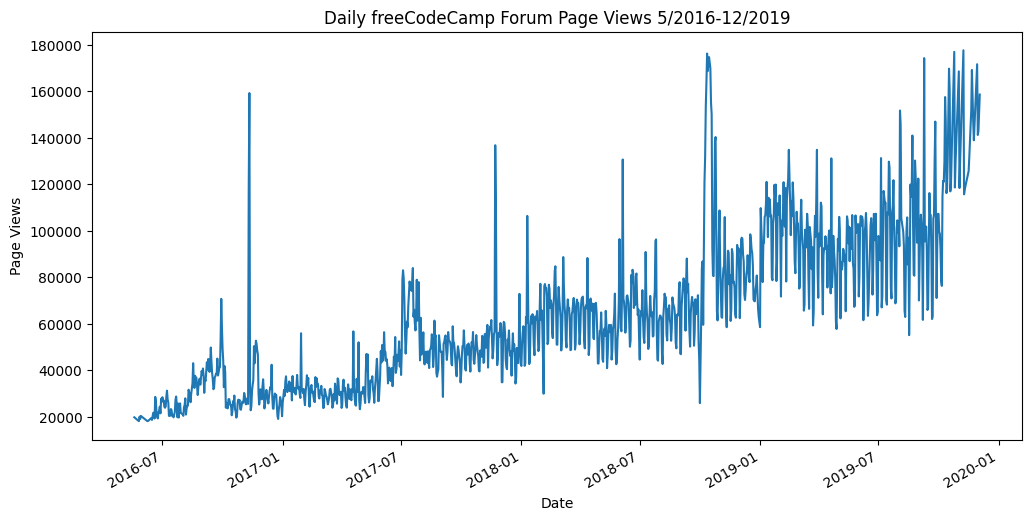

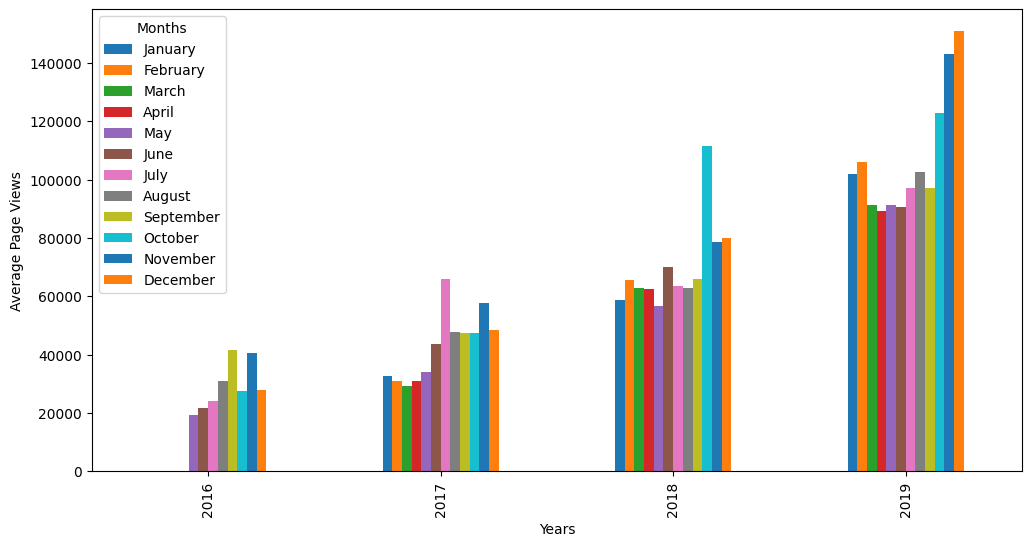

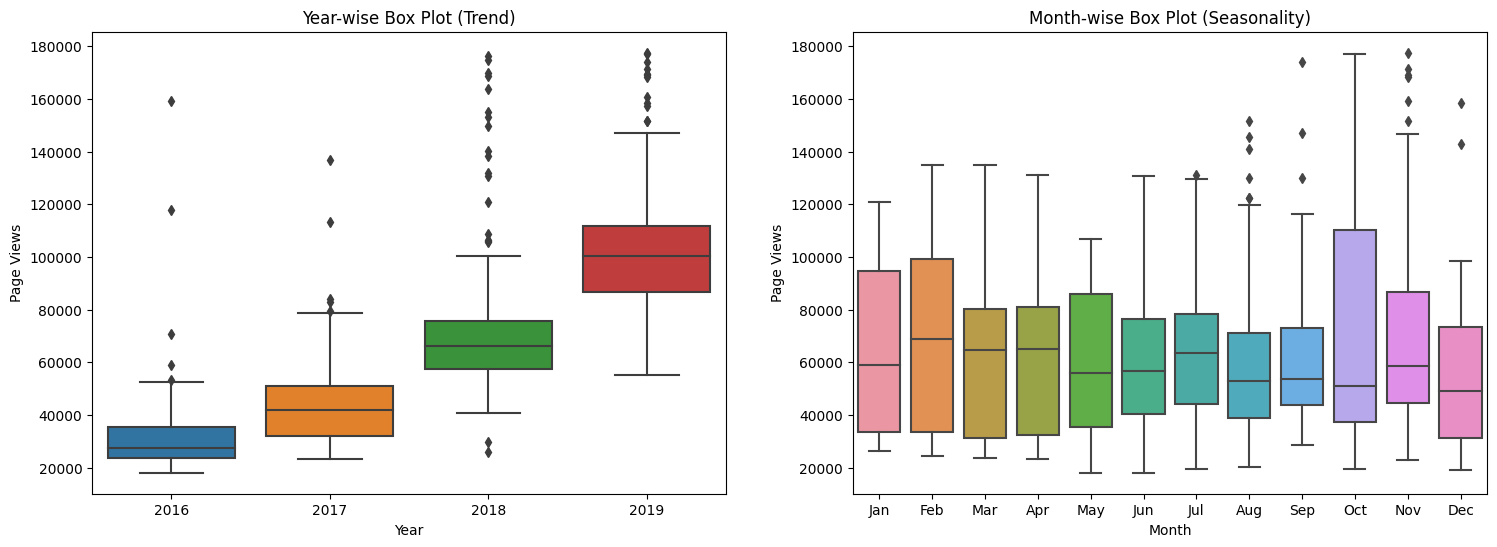

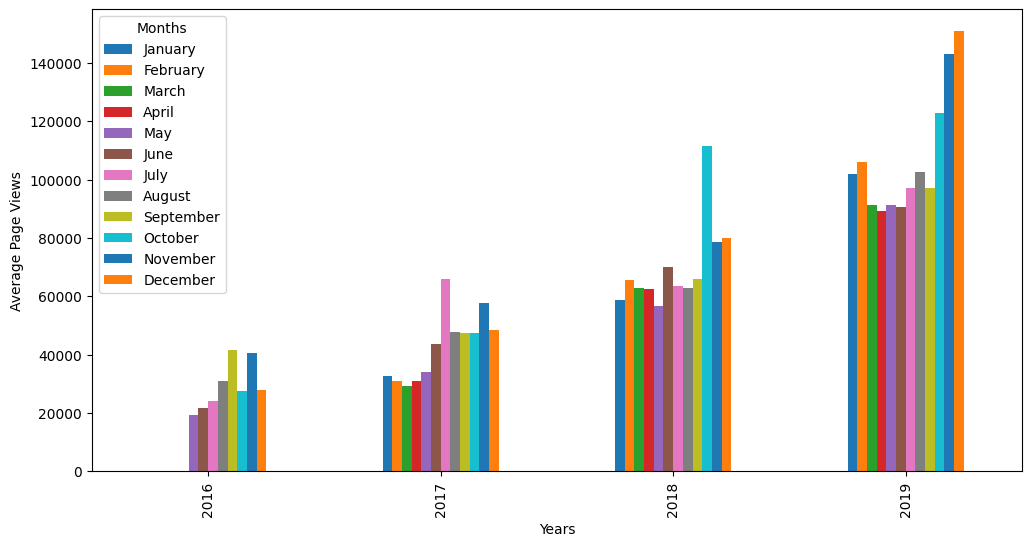

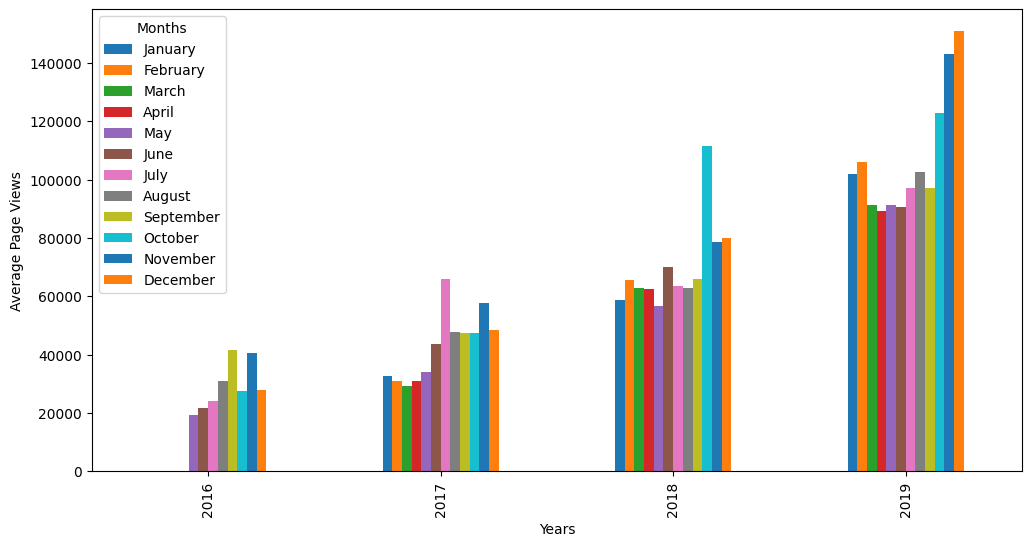

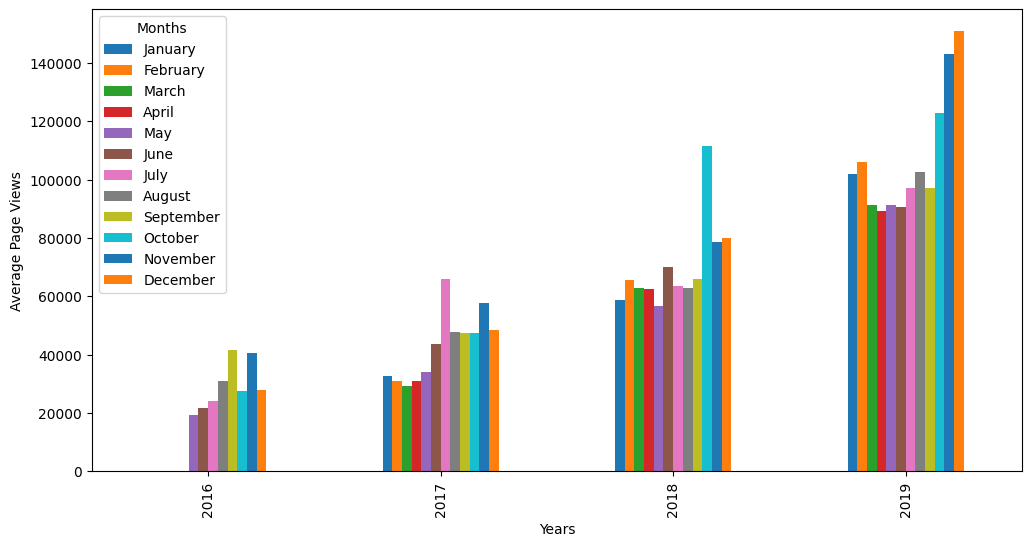

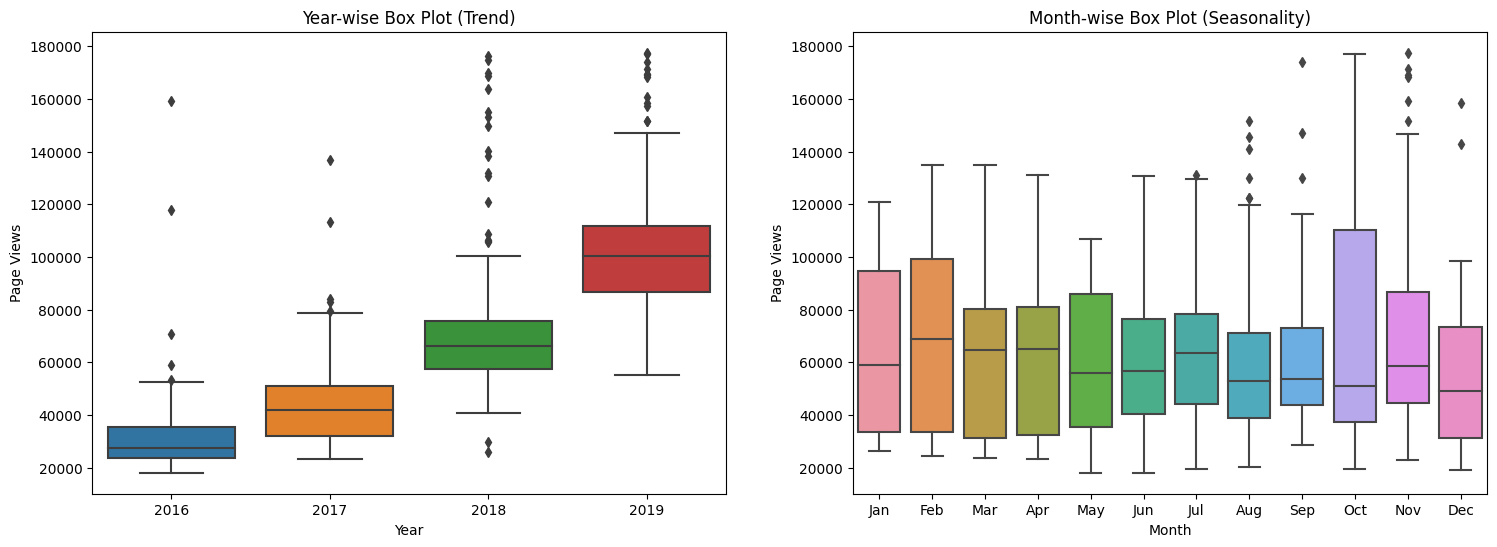

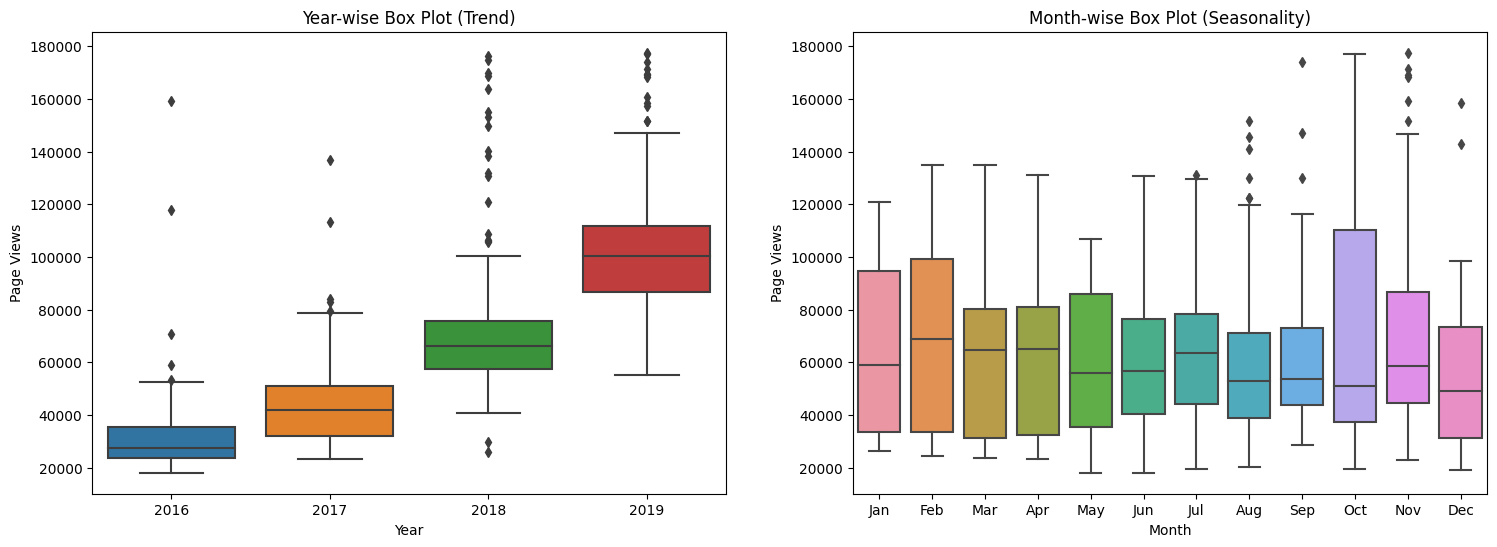

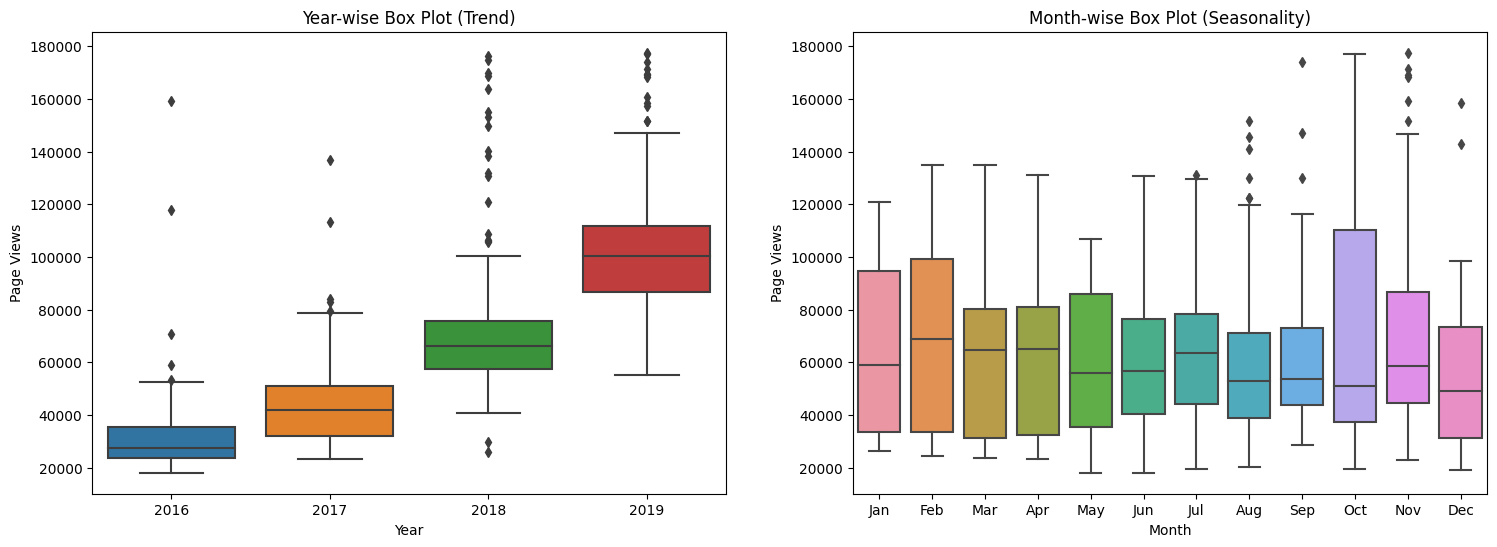

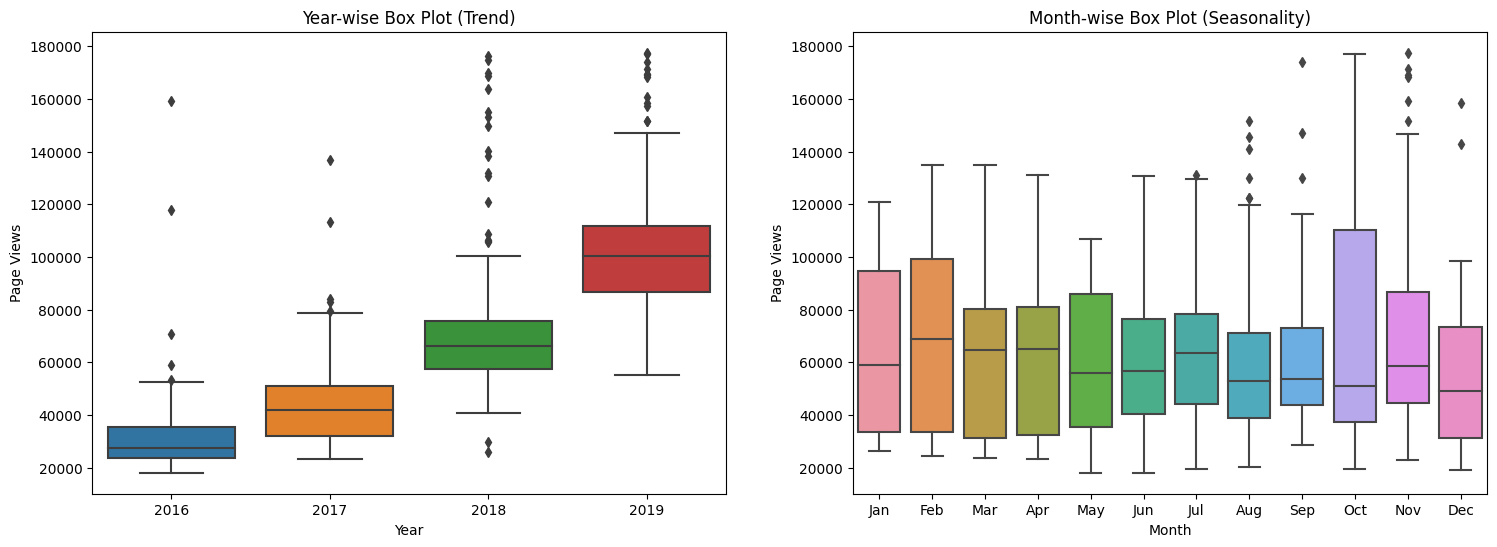

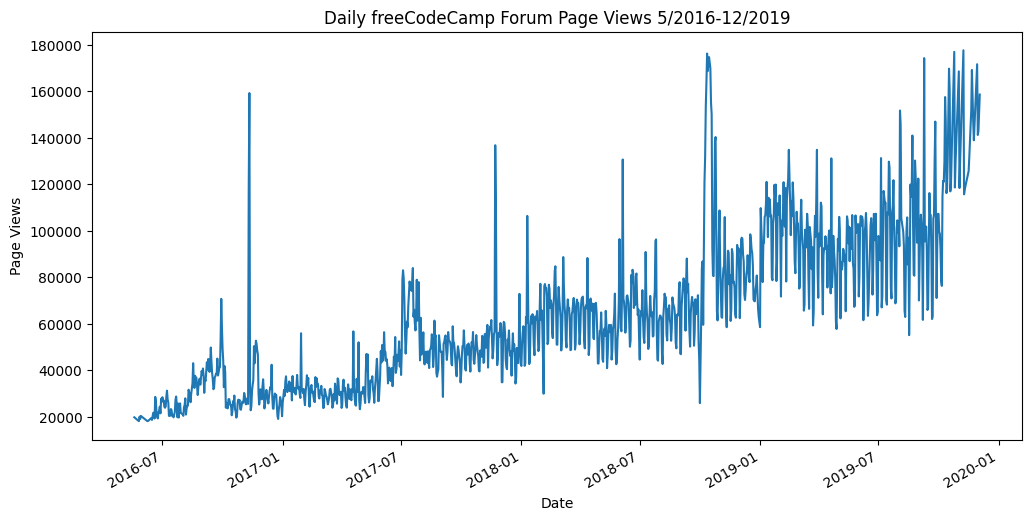

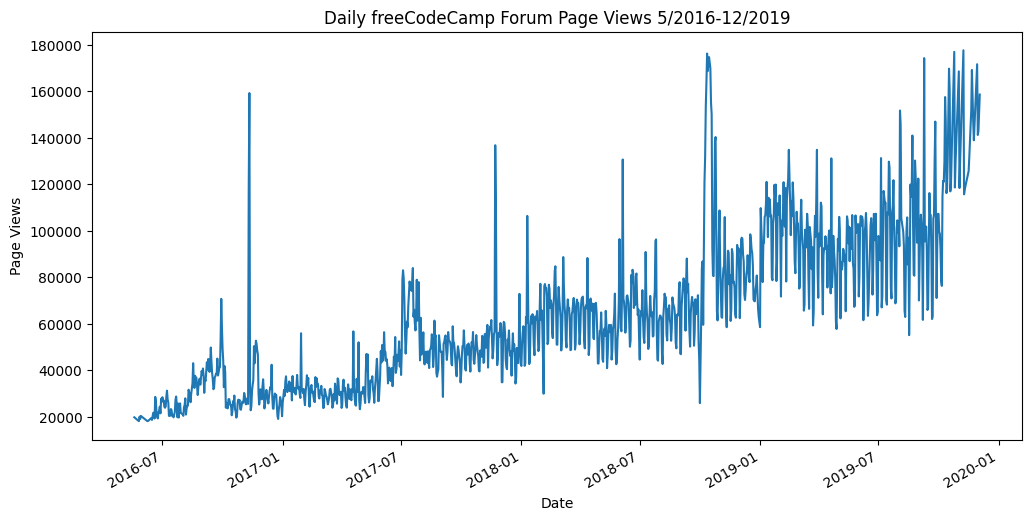

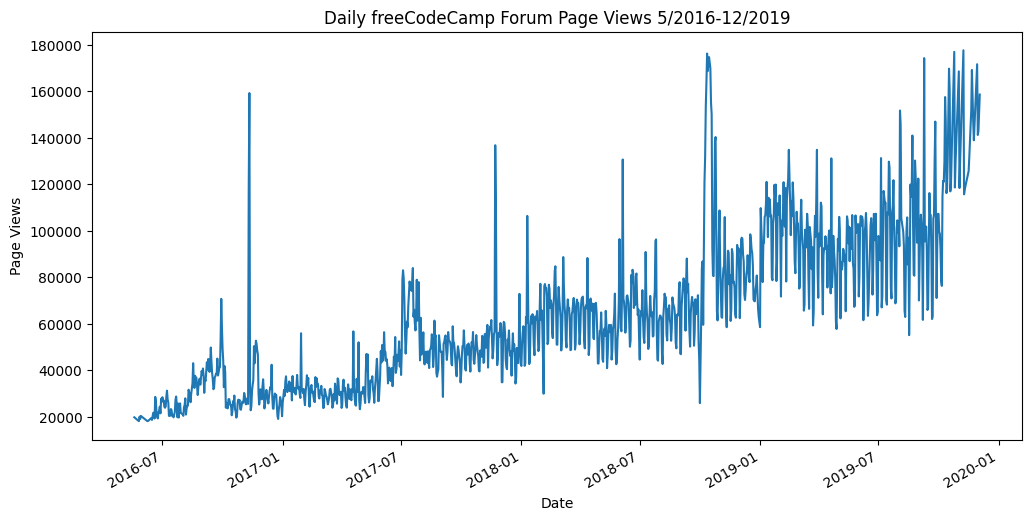

In [3]:
# NOTE: Copied from main.py
# This entrypoint file to be used in development. Start by reading README.md
from unittest import main

# Test your function by calling it here
time_series_visualizer.draw_line_plot()
time_series_visualizer.draw_bar_plot()
time_series_visualizer.draw_box_plot()

# Run unit tests automatically
main(argv=[''], exit=False)